In [25]:
!pip install pandas
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org, https://pypi.org/simple/
Looking in indexes: https://pypi.org, https://pypi.org/simple/
Looking in indexes: https://pypi.org, https://pypi.org/simple/
  Using cached wordcloud-1.8.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (458 kB)


# Import Libraries

In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
import re

# Configuration

In [41]:
dataset = 'shakespeare'
dataset_file = os.path.realpath('{}.csv'.format(dataset))

In [42]:
def filter_tokens(tokens):
    stopwords = list(set(nltk.corpus.stopwords.words("english")))
    non_alphbetical = ["’", "“", ".",",",";","&","'s", ":", "?", "!","(",")", "@","'","'m","'no","*","--","...","[","]", "#", "%", "''", "$", "+"]
    clean_tokens = []
    for token in tokens:
        token = token.lower()
        token = re.sub('[\',.;]', '', token)
        if token not in stopwords and token not in non_alphbetical and len(token.strip()) > 0:
            clean_tokens.append(token)
    return clean_tokens

# Data Analysis

In [44]:
df = pd.read_csv(dataset_file, index_col = False)
df['clean_text'] = df['text'].apply(lambda x: nltk.word_tokenize(x)).apply(lambda x: filter_tokens(x))
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x))
df_real = df[df.label == 0]
df_fake = df[df.label == 1]
display(df.head(10))

,text,title,label,type,clean_text
0,we thank you: so farewell. [Exeunt all but Cob...,Sir John Oldcastle by Shakespeare,1,train,thank farewell exeunt cobham cobham farewell n...
1,"ughter, if you have not given her leave, I say...",THE TRAGEDY OF OTHELLO MOOR OF VENICE,0,train,ughter given leave say hath made gross revolt ...
2,", and run-- Swifter the winde upon a feild of ...",The Two Noble Kinsmen by Shakespeare,1,train,run swifter winde upon feild corne curling wea...
3,". Therefore, we usually do NOT! keep these boo...",Locrine Mucedorus by Shakespeare,1,train,therefore usually keep books compliance partic...
4,Look on't again I dare not. LADY MACBETH. Infi...,THE TRAGEDY OF MACBETH,0,train,look nt dare lady macbeth infirm purpose give ...
5,"r Mark Antony, think not of him, For he can do...",THE TRAGEDY OF JULIUS CAESAR,0,train,r mark antony think caesar arm caesar head cas...
6,"ook no braves. March on, Assarachus; thou must...",Locrine Mucedorus by Shakespeare,1,train,ook braves march assarachus thou must lead way...
7,"meet.] NICHOLAS. What, Corporal Oath? I am sor...",The Puritaine Widdow by Shakespeare,1,train,meet nicholas corporal oath sorry met next hea...
8,"earth, Or as the ploughman with his piercing s...",Locrine Mucedorus by Shakespeare,1,train,earth ploughman piercing share renteth bowels ...
9,turne th'allarme to whispers; that canst make ...,The Two Noble Kinsmen by Shakespeare,1,train,turne thallarme whispers canst make criple flo...


In [47]:
all_real_text = ' '.join(df_real.clean_text)
all_fake_text = ' '.join(df_fake.clean_text)

In [49]:
# average length of documents
df.text.apply(len).mean()

119.52469441107893

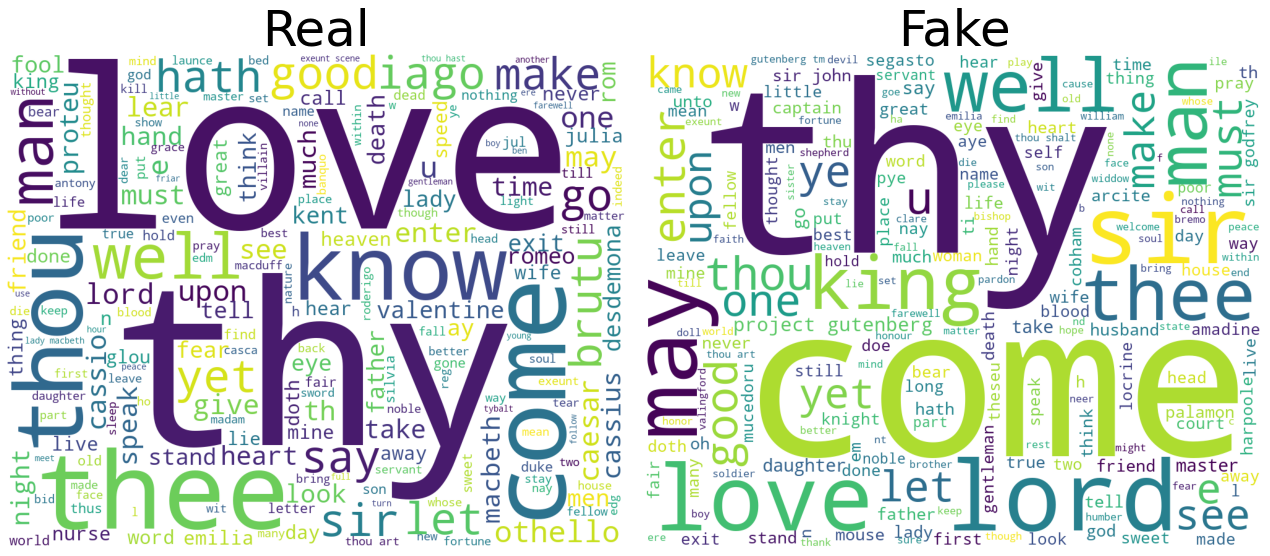

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (18,12))
ax[0].set_title('Real', fontsize = 50)
ax[1].set_title('Fake', fontsize = 50)
stopwords = set(STOPWORDS)
wordcloud_real = WordCloud(width = 1000, height = 800, background_color = 'white', min_font_size = 10).generate(all_real_text)
wordcloud_fake = WordCloud(width = 1000, height = 800, background_color = 'white', min_font_size = 10).generate(all_fake_text)
ax[0].imshow(wordcloud_real)
ax[1].imshow(wordcloud_fake)
ax[0].axis('off')
ax[1].axis('off')
plt.tight_layout(pad = 2)
plt.show()

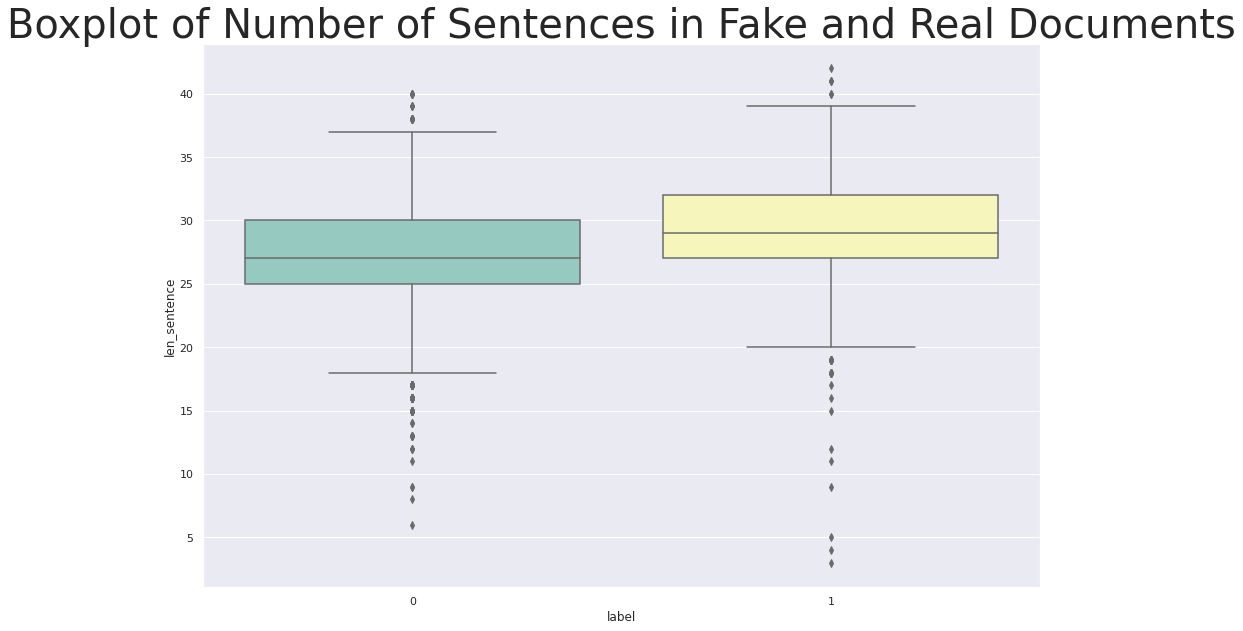

In [80]:
df['len_sentence'] = df['text'].apply(lambda x: nltk.word_tokenize(x)).apply(len)
sns.boxplot(y = 'len_sentence', x = 'label', data = df, palette = 'Set3')
sns.set(rc={"figure.figsize":(15, 10)})
plt.title("Boxplot of Number of Sentences in Fake and Real Documents", fontsize = 40)
plt.show()

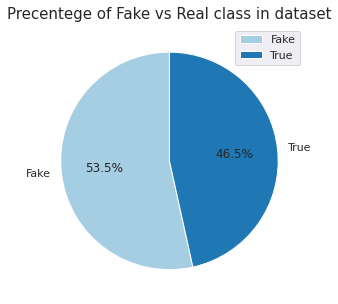

1    7566
0    6587
Name: label, dtype: int64

In [96]:
labels_count = df.label.value_counts(sort = True)
plt.figure(figsize=(8,5))
plt.pie(labels_count, labels = ['Fake', 'True'],
        autopct='%1.1f%%', startangle = 90, colors = plt.cm.Paired(np.arange(df.label.nunique())))
plt.title('Precentege of Fake vs Real class in dataset', fontsize = 15)
plt.legend(labels = ['Fake', 'True'], loc = 'best')
plt.show()
df.label.value_counts()